### MLflow

An open source platform for the machine learning lifecycle including experimentation, reproducibility, deployment, and a central model registry. MLflow currently offers four components:

https://mlflow.org/

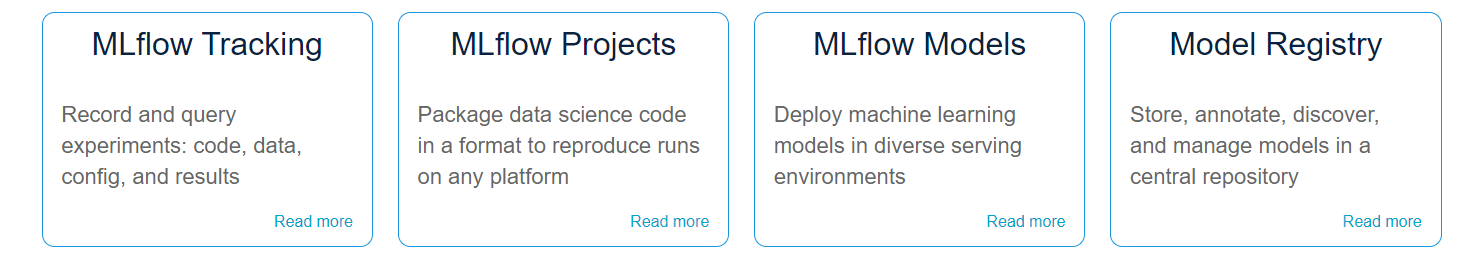

###Install MLflow

If we delopy Mlflow in server, we can do experimental tracking on same ML Project perfoming by different team member within a team

a. use vscode powershell
b. choose python env for respective project. here we us `python 3.8.6` by creating `pyenv` environment eariler(intial days)
for choosing pyenv using powershell:
>>`pyenv shell 3.8.6`


and also can be choosen


vscode>>above navigation>>View >> command palette >> python(select Interpreter) >> Python pyenv 3.8.6

Using PiP installation, we can install **MLflow** in powershell terminal vscode

`pip install mlflow`

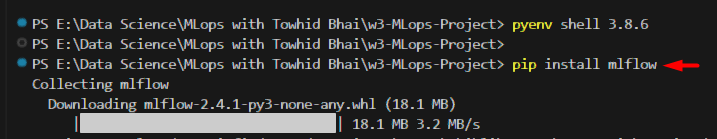

### import MLflow in jyputer notebook at vscode for experimental tracking



In [1]:
'''
import mlflow

'''

'\nimport mlflow\n\n'

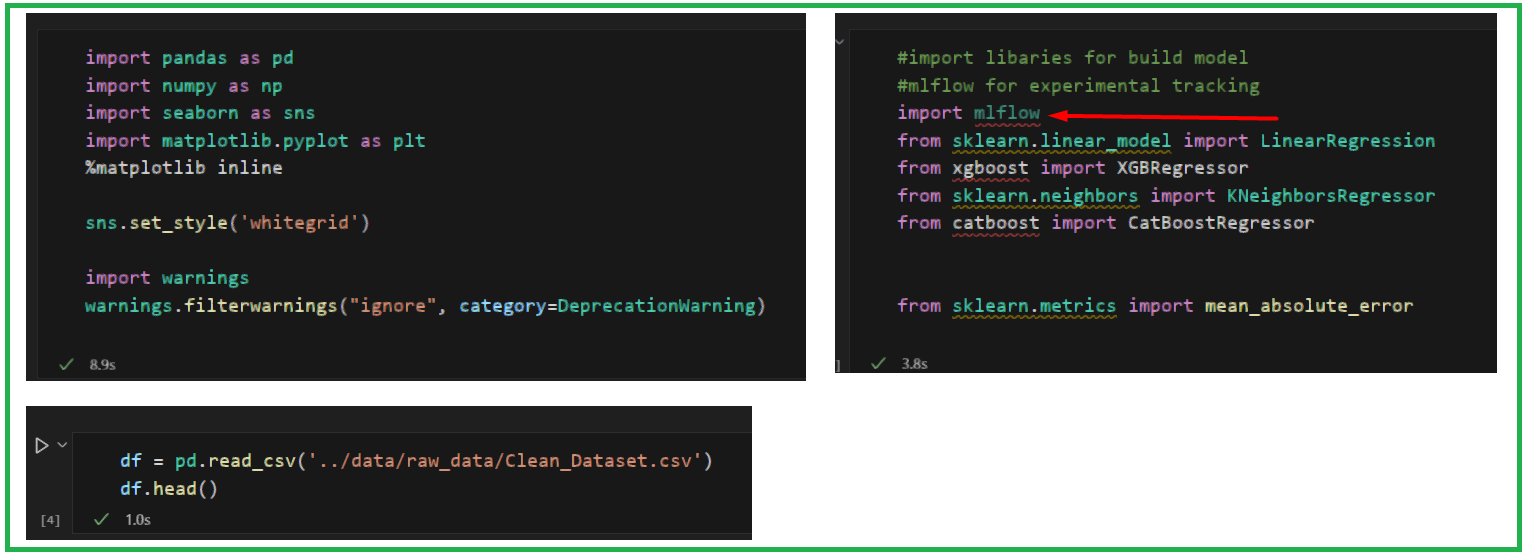

In [ ]:
'''
import mlflow
from mlflow import log_metric, log_param, log_params, log_artifacts
'''


log_metric: use for to log  evaluation result/model performance (such mae) the model

log_params: to store multiple parameters as dictionary

log_param: single parameter

log_artifacts: use to connect with server to store metadata in storage(such as S3 Bucket)

### To get access to MLflow UI

using following command in powershell to see the MLflow UI and get the log results

>>`mlflow ui`

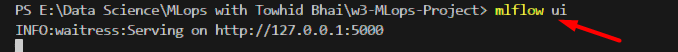

### Code Glimpse

<h2>MLops<h2>

```
6. To get access to MLflow UI
using following command in powershell to see the MLflow UI and get the log results

>>mlflow ui
#get a local host urls
http://127.0.0.1:5000

7.add mlops code for localhost url and experiment name

    #mlflow local host integration
    TRACKING_SERVER_HOST = 'localhost'
    mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")
    #set experment name
    mlflow.set_experiment(experiment_name= 'airlines-eda-basic-ml-V1')

8. Need to perform mlflow.start_run() and mlflow.end_run()
	#mlflow start run
        with mlflow.start_run():

		#mlflow end run(should be placed at the end before any hashing)
		mlflow.end_run()

9. place log_metric, log_param, log_params depends on requirement
example
	          #mlflow log_param start
            log_param('model_name', name)
            log_param('one-hot-encoding', True )
            log_param('transformer', 'yeojhonson')
            #mlflow log_param end

	          #mlflow log_metric start
            log_metric('mae', mae)
            #mlflow log_metric end
```

In [ ]:
#Code glimpse

#for dataset (need to import required libaries)
"""
df = pd.read_csv('../data/raw_data/Clean_Dataset.csv')
df.head()
"""
#perfom missing value treatment and others
#feature engineering
"""
def preprocessing(df):

    #ordinal numerical conversion

    stops_dict = {'zero' : 0, 'one' : 1, 'two_or_more' : 2}
    df['stops'] = df['stops'].replace(stops_dict).astype(int)

    class_dict = {'Economy' : 0, 'Business' : 1}
    df['class'] = df['class'].replace(class_dict).astype(int)

    #onehot encoding using dummy variable
    dummies_variable = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
    dummies = pd.get_dummies(df[dummies_variable], drop_first= True).astype(int)

    df = pd.concat([df, dummies], axis = 1) #coloumnwise

    #drop the columns which have already encoded
    df = df.drop(['Unnamed: 0', 'airline', 'flight', 'source_city',
                  'departure_time', 'arrival_time', 'destination_city'], axis = 1)
    return df
"""
#prepared model training function and integrate with MLflow
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

#mlflow for experimental tracking
import mlflow
from mlflow import log_metric, log_param, log_params, log_artifacts
#to save model using pickle
import pickle

#create funcation for models to evaluate mae
def test_mae(df):
    #mlflow local host integration
    TRACKING_SERVER_HOST = 'localhost'
    mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")
    #set experment name
    mlflow.set_experiment(experiment_name= 'airlines-eda-basic-ml-V1')
    X = df.copy()
    y = X.pop("price")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
                                            random_state = 42, shuffle= True )

    models = {}

    models['LinearRegression'] = {"model" : LinearRegression()}
    models['XGBRegressor'] = {"model" : XGBRegressor()}
    models["KNeighborsRegressor"] = {"model" : KNeighborsRegressor()}
    models["CatBoostRegressor"] = {"model" : CatBoostRegressor()}

    #mlflow
    TRACKING_SERVER_HOST = 'localhost'
    mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")

    for name, model in models.items():
        #mlflow start run
        with mlflow.start_run():
            #mlflow log_param start
            log_param('model_name', name)
            log_param('one-hot-encoding', True )
            log_param('transformer', 'yeojhonson')
            #mlflow log_param end
            trained_model = model['model'].fit(X_train, y_train)
            y_pred = trained_model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            #mlflow log_metric start
            log_metric('mae', mae)
            #mlflow log_metric end
            print("----"+name+"----")
            print(f"mean_absolute_error: {mae}")
            #mlflow end run (should be before any hashing)
            mlflow.end_run()
            #To save model using pickel
            #filename = model/name
            #pickle.dump(trained_model, open(filename, 'wb'))

            #mlflow log_artifacts start
            #log_artifacts()
            #mlflow log_artifacts end
"""
#prepare dataset and run the models using for loop

"""
df_features = df_processed.copy()

#we only apply yoejohnson on "duration". day_left doesn't work well
col = "duration"

y, _ = yeojohnson(df_features[col])
df_features[col] = y
test_mae(df_features)


"""

### MLflow output

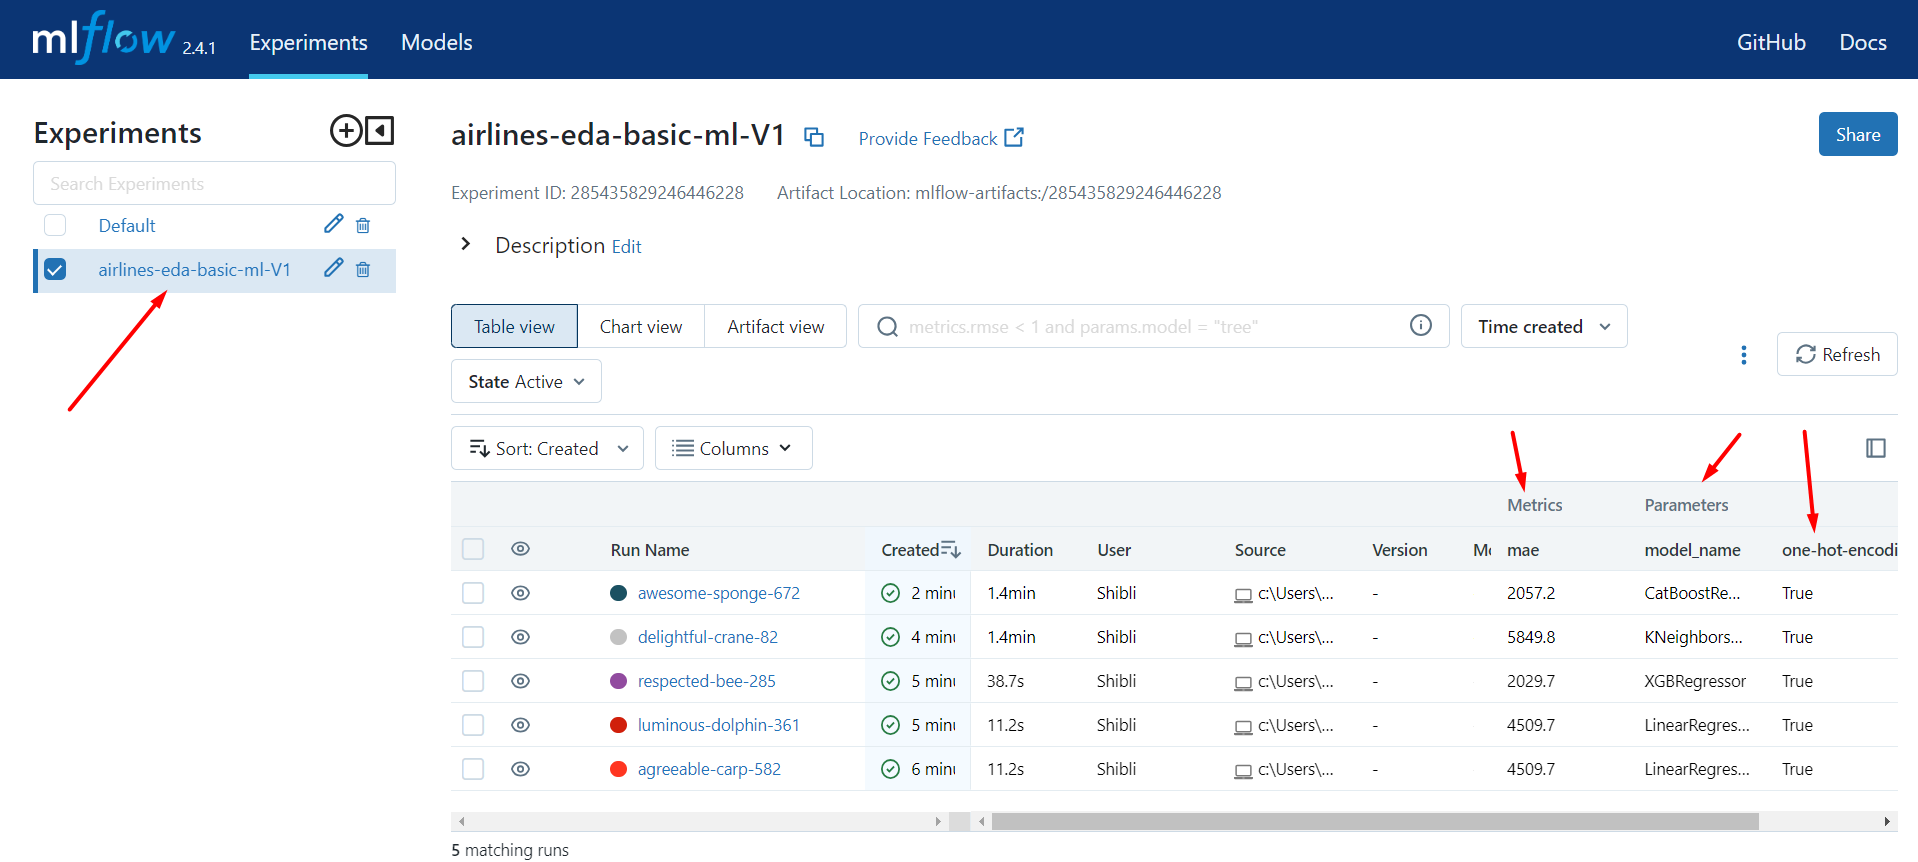